# Problem Statement:
Buying a house is everyone's dream and the biggest asset an average individual owns. But making a decision to where to buy House is equally hectic decision and the most important part is price. The price of house determines whether an Idividual will be able to make his/her dream come true. But price is dependent on sevral factors and through this case we will try to study the parameters and how these parameters impact the price of house.

# Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
dataset = pd.read_csv("train.csv")

In [3]:
pd.pandas.set_option("display.max_columns",None)

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print(dataset.shape)

(1460, 81)


In [6]:
data = dataset.copy()

# Pre-Processing Steps:

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Statistical Summary

In [8]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#Step1: Finding Null Values

In [10]:
NA_Values = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]
for feature in NA_Values:
    print(feature, np.round(dataset[feature].isnull().mean(),4),"%Missing Values")

LotFrontage 0.1774 %Missing Values
Alley 0.9377 %Missing Values
MasVnrType 0.0055 %Missing Values
MasVnrArea 0.0055 %Missing Values
BsmtQual 0.0253 %Missing Values
BsmtCond 0.0253 %Missing Values
BsmtExposure 0.026 %Missing Values
BsmtFinType1 0.0253 %Missing Values
BsmtFinType2 0.026 %Missing Values
Electrical 0.0007 %Missing Values
FireplaceQu 0.4726 %Missing Values
GarageType 0.0555 %Missing Values
GarageYrBlt 0.0555 %Missing Values
GarageFinish 0.0555 %Missing Values
GarageQual 0.0555 %Missing Values
GarageCond 0.0555 %Missing Values
PoolQC 0.9952 %Missing Values
Fence 0.8075 %Missing Values
MiscFeature 0.963 %Missing Values


In [11]:
# Dropping Columsn with more than 25% data Missing

In [12]:
dataset = dataset.drop(["MiscFeature","Fence","PoolQC","FireplaceQu","Alley"],axis =1)

<AxesSubplot:ylabel='LotFrontage'>

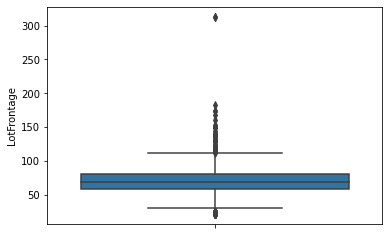

In [13]:
sns.boxplot(y = "LotFrontage", data = dataset)

In [14]:
#Since Lot Frontage has outlier, I will use Median to fill the NA values and for MASVnrARea and Garageyrblt will use man as they dont have outliers.

In [15]:
dataset["LotFrontage"] = dataset["LotFrontage"].fillna(dataset["LotFrontage"].median())

In [16]:
dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(dataset["MasVnrArea"].mean())

In [17]:
dataset["GarageYrBlt"] = dataset["GarageYrBlt"].fillna(dataset["GarageYrBlt"].mean())

In [18]:
dataset["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [19]:
dataset["BsmtQual"]=dataset["BsmtQual"].fillna("TA")

In [20]:
dataset["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [21]:
dataset["BsmtCond"]=dataset["BsmtCond"].fillna("TA")

In [22]:
dataset["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [23]:
dataset["BsmtExposure"]=dataset["BsmtExposure"].fillna("No")

In [24]:
dataset["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [25]:
dataset["BsmtFinType1"]=dataset["BsmtFinType1"].fillna("unf")

In [26]:
dataset["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [27]:
dataset["BsmtFinType2"]=dataset["BsmtFinType2"].fillna("unf")

In [28]:
dataset["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [29]:
dataset["Electrical"]=dataset["Electrical"].fillna("SBrkr")

In [30]:
dataset["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [31]:
dataset["GarageType"]= dataset["GarageType"].fillna("Attchd")

In [32]:
dataset["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [33]:
dataset["GarageFinish"]=dataset["GarageFinish"].fillna("unf")

In [34]:
dataset["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [35]:
dataset["GarageCond"]=dataset["GarageCond"].fillna("TA")

In [36]:
# Null Values are filled. Proceeding for EDA

In [37]:
dataset = dataset.drop(["Id"], axis =1 )

In [38]:
#Identify Numerical Features

In [39]:
Numerical_Features = [feature for feature in dataset.columns if dataset[feature].dtype != "O"]
print("Number of Numerical_Features:",len(Numerical_Features))

Number of Numerical_Features: 37


# Processing Time and Year Column

In [40]:
year_feature = [feature for feature in Numerical_Features if "Yr" in feature or "Year" in feature]

print(year_feature)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [41]:
dataset.groupby("YrSold")["SalePrice"].median()

YrSold
2006    163995.0
2007    167000.0
2008    164000.0
2009    162000.0
2010    155000.0
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'House price vs YrSold')

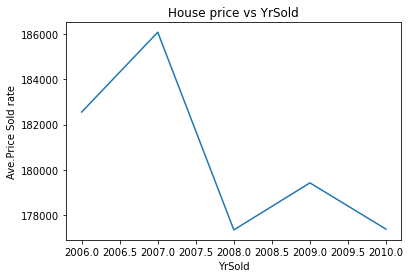

In [42]:
dataset.groupby("YrSold")["SalePrice"].mean().round(decimals = 0).plot().Text =1 
plt.xlabel("YrSold")
plt.ylabel("Ave.Price Sold rate")
plt.title("House price vs YrSold")

# An unusual finding: As the Year Increase sales seems to be going down. Probable Reasons:
#Recession in US or Ageing Houses

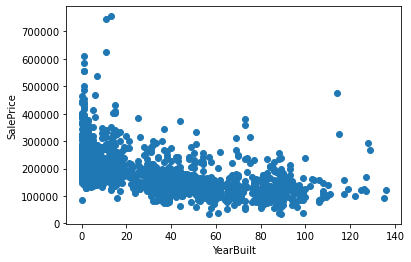

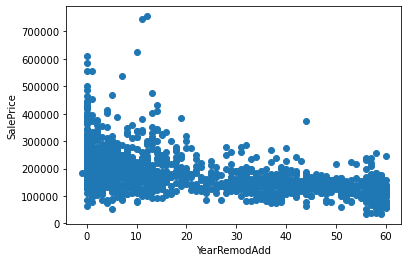

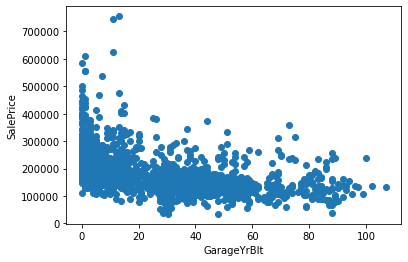

In [43]:
for feature in year_feature:
    if feature != "YrSold":
        data = dataset.copy()
        data[feature] = data["YrSold"]-data[feature]

        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

In [44]:
# Recently the House built/or Modified higher the price!

In [45]:
# Will study seperately the discrete features, altough Numerical they have limited values

In [46]:
discrete_feature= [feature for feature in Numerical_Features if len(dataset[feature].unique())<10 and feature not in year_feature]
print("Discrete Variable Count:{}".format(len(discrete_feature)))

Discrete Variable Count:10


In [47]:
dataset[feature].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [48]:
dataset[feature]

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64

In [49]:
discrete_feature

['OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea']

In [50]:
dataset[['FullBath']]

,FullBath
0,2
1,2
2,2
3,1
4,2
...,...
1455,2
1456,2
1457,2
1458,1


In [51]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


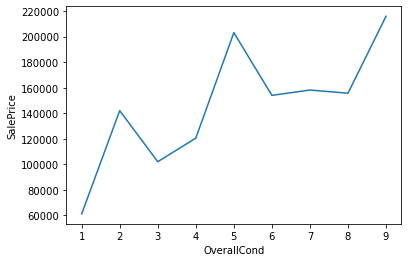

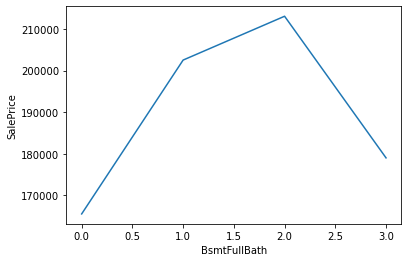

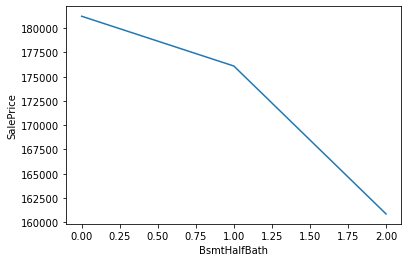

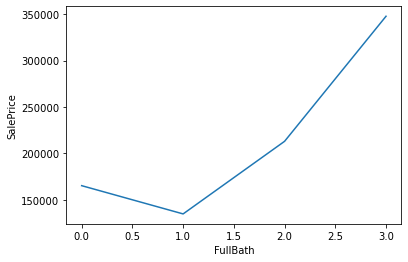

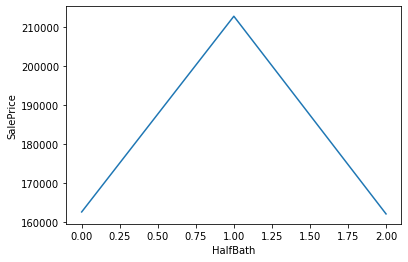

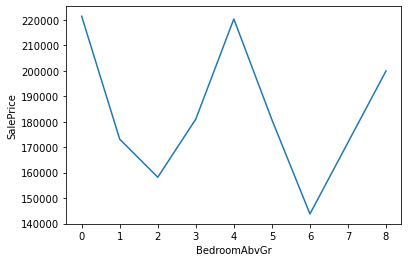

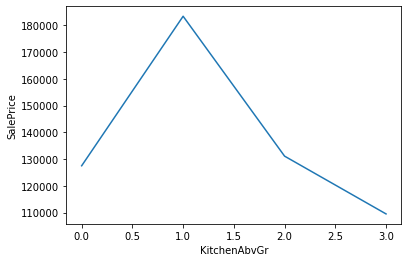

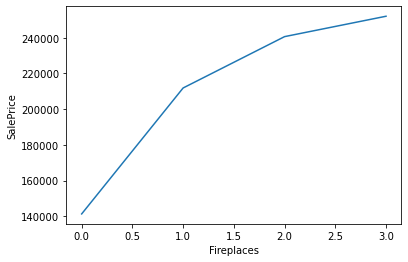

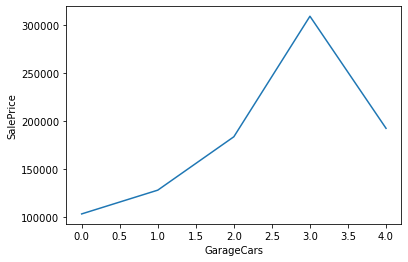

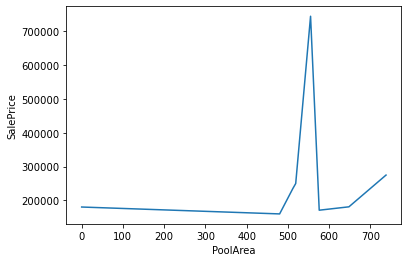

In [52]:
for feature in discrete_feature:
    data = dataset.copy()
    data.groupby(feature)["SalePrice"].mean().round(decimals = 0).plot()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()
    

# Findings

Overall Condition is impacting price, as it goes up the price goesup.

Customer wants 3 full bath.

If only kitchen is above ground then sale price is high.

no of Fireplaces is directly proportional to SalePrice.

Having 3 Garage Cars is ideal# Has been increasing till 3 but reduced for 4.

# Identification of Categorical variables

In [53]:
categorical_variable= [feature for feature in dataset.columns if dataset[feature].dtype =="O"]

print("Number of categorical Variables are {}".format(len(categorical_variable)))

Number of categorical Variables are 38


In [54]:
categorical_variable

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

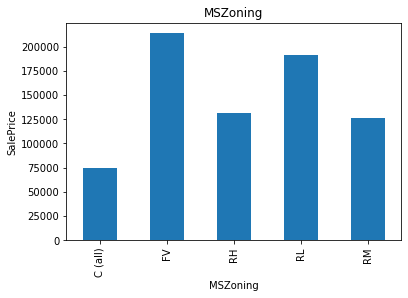

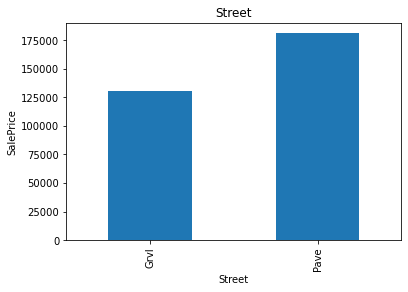

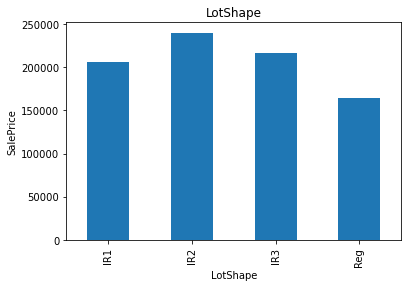

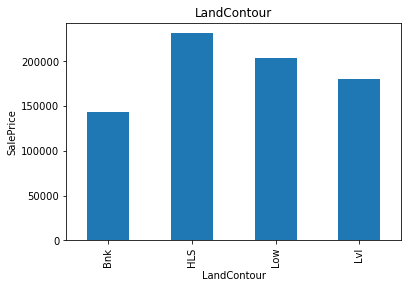

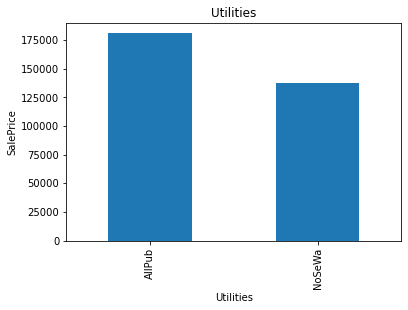

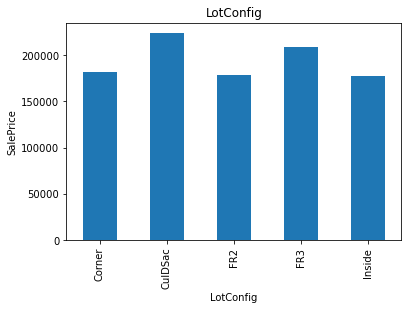

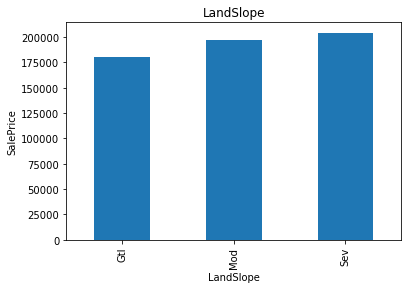

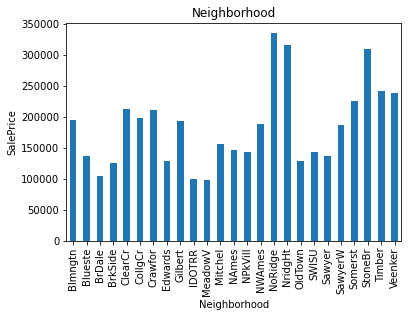

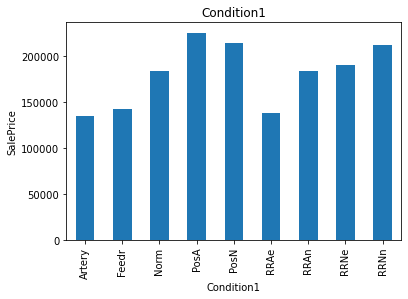

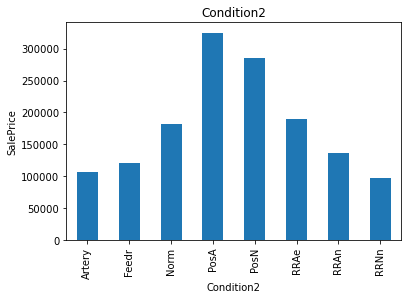

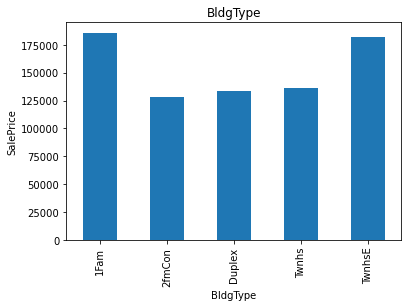

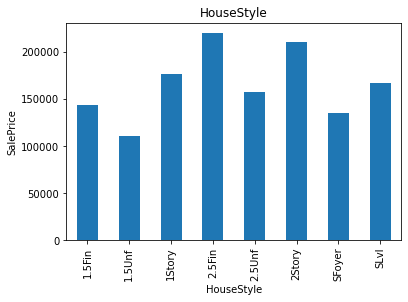

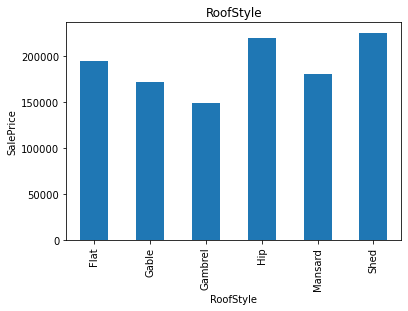

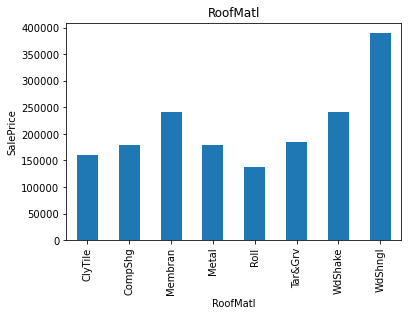

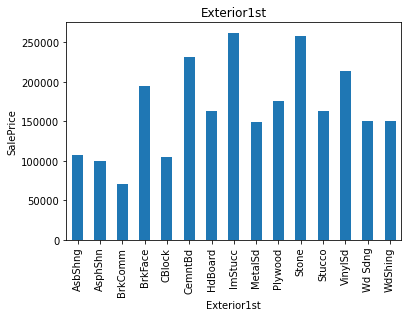

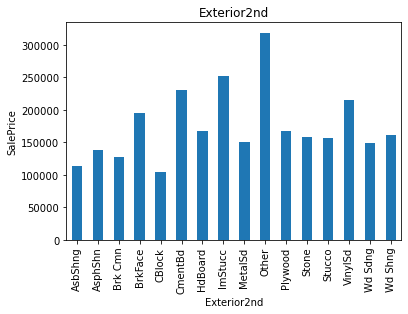

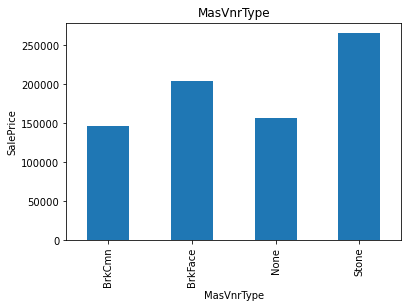

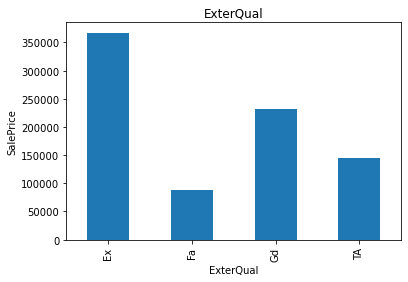

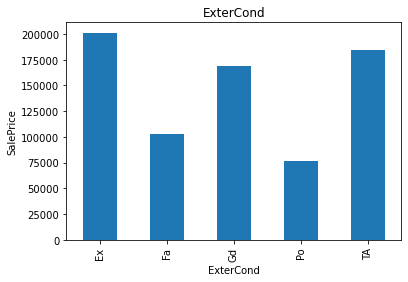

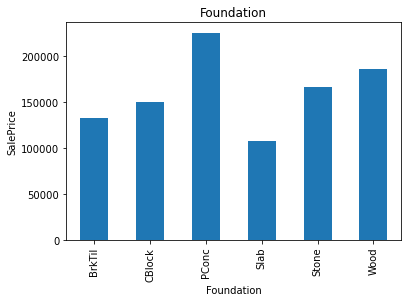

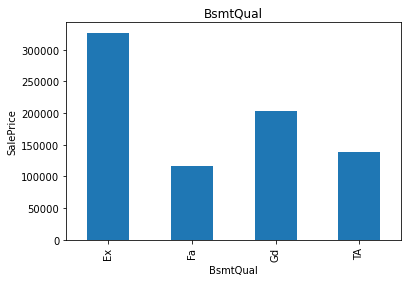

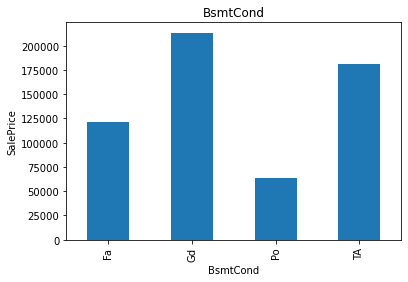

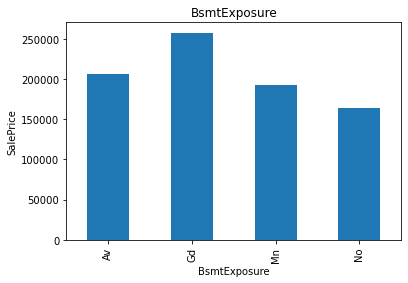

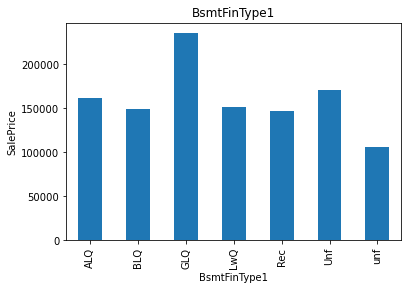

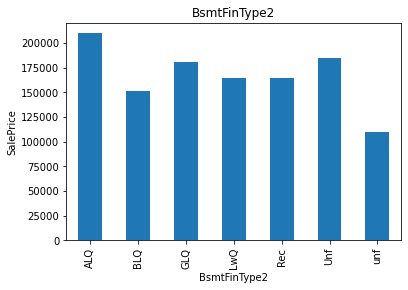

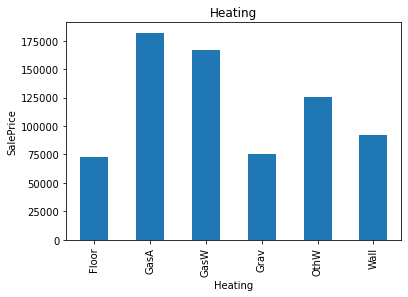

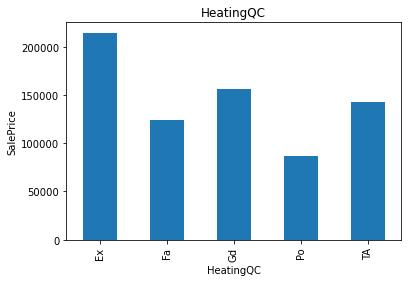

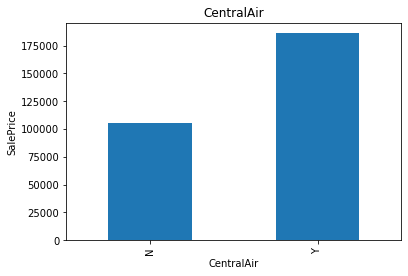

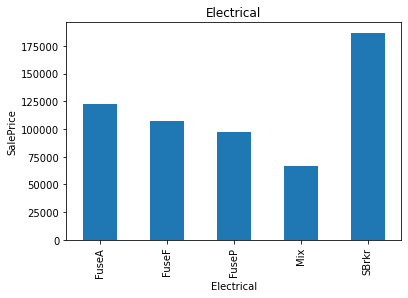

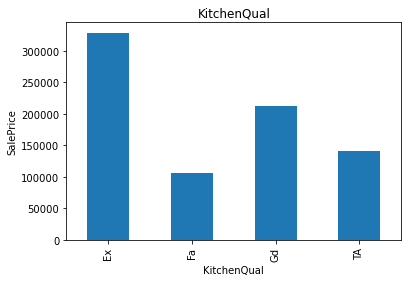

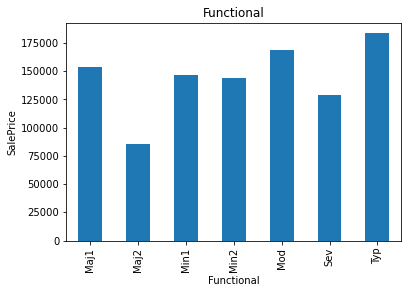

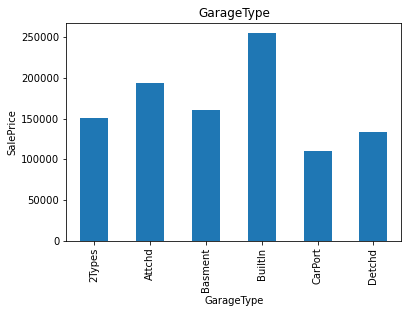

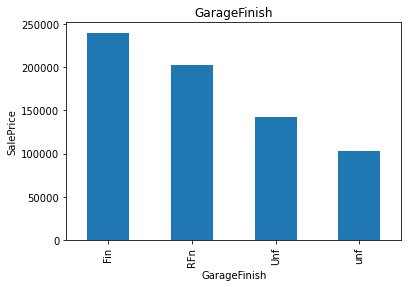

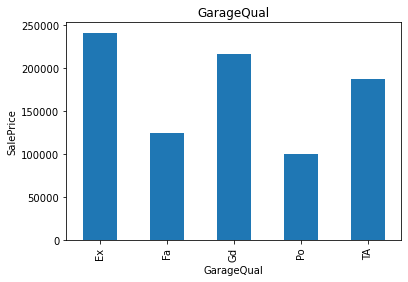

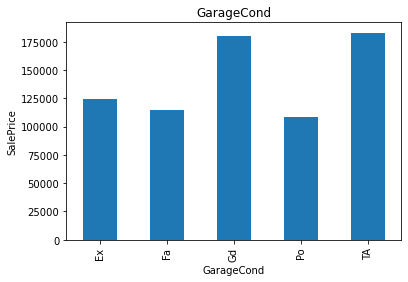

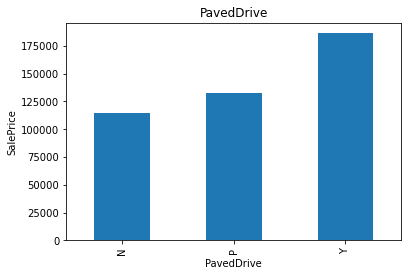

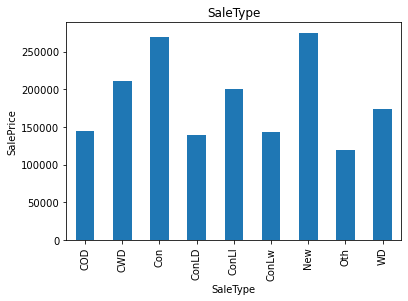

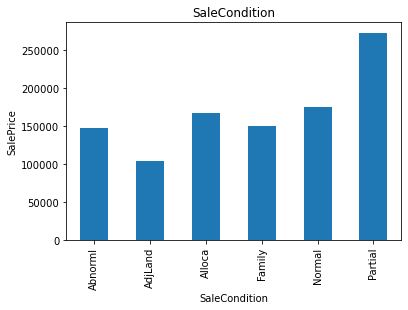

In [55]:
for feature in categorical_variable:
    data = dataset.copy()
    data.groupby(feature)["SalePrice"].mean().round(decimals=0).plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

# Finding from Categorical_Variable
Having a Central Airconditioner does make a difference

Having a Paved Drive Increases the price

Garage finish is impacting the price

Excellent Kitchen Quality is impacting significantly

In [56]:
# Continuous Varibales

In [57]:
continuous_feature = [feature for feature in Numerical_Features if feature not in discrete_feature + year_feature]
print("No of continuous feature are : {}".format(len(continuous_feature)))

No of continuous feature are : 23


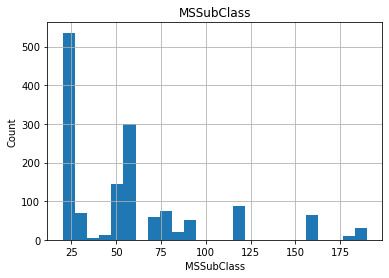

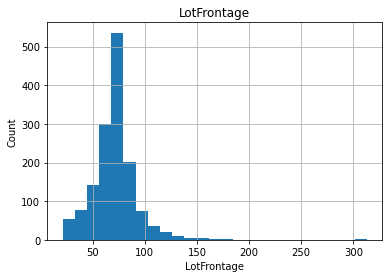

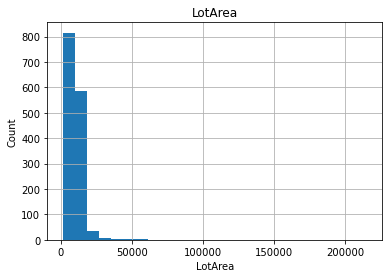

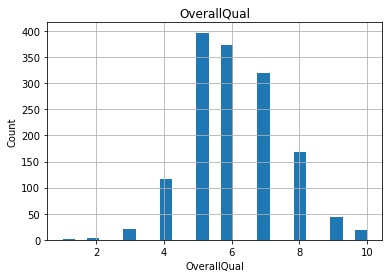

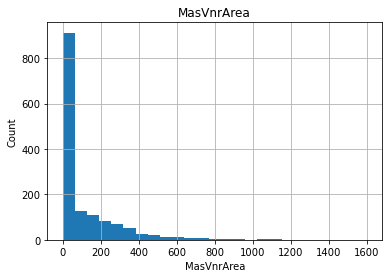

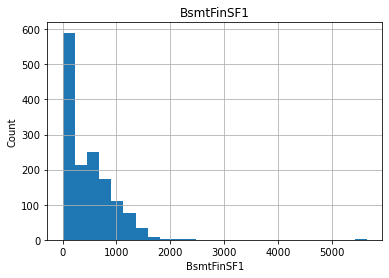

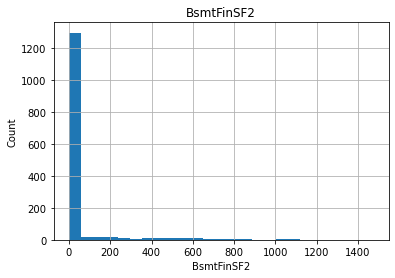

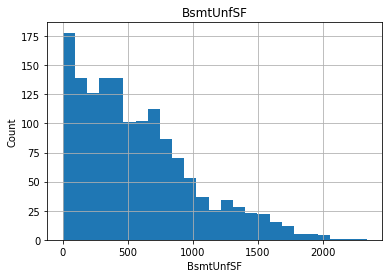

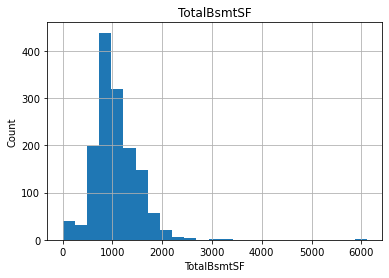

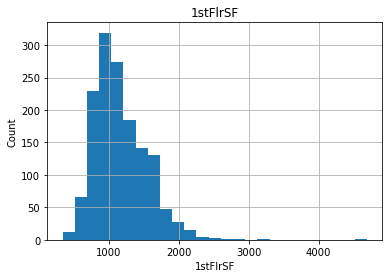

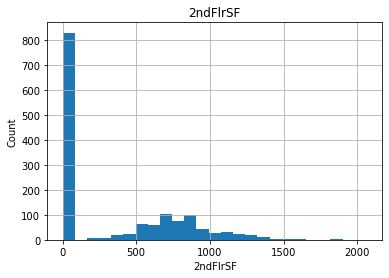

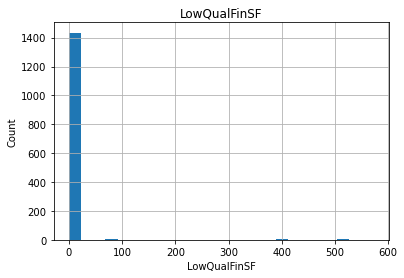

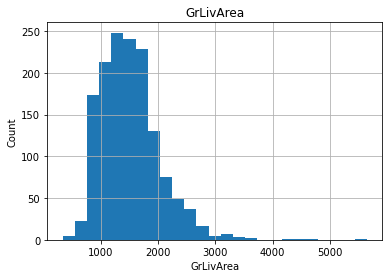

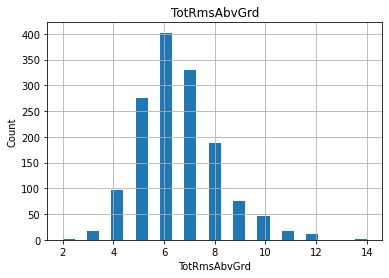

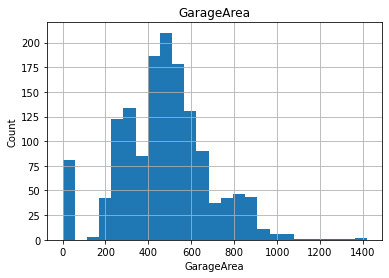

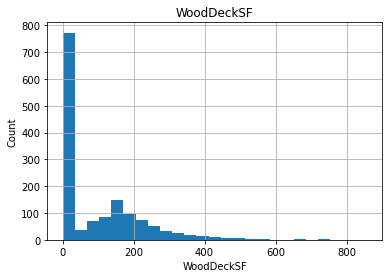

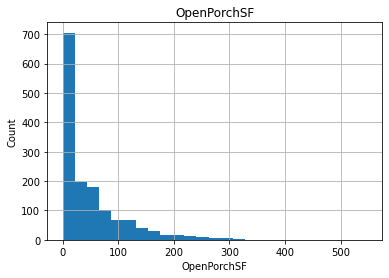

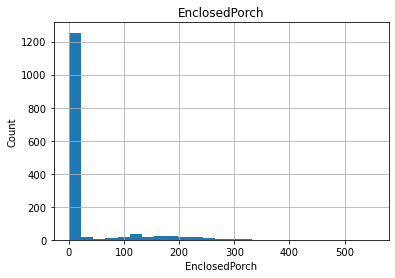

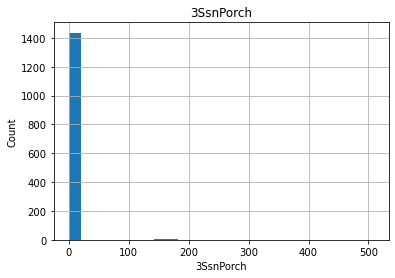

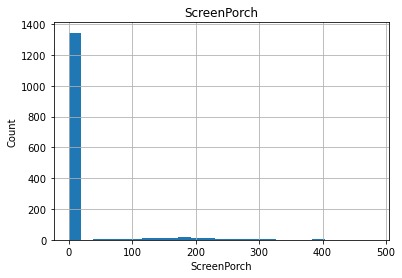

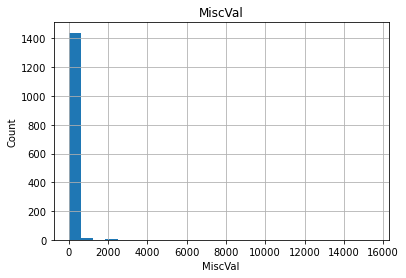

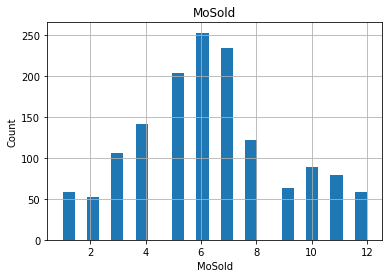

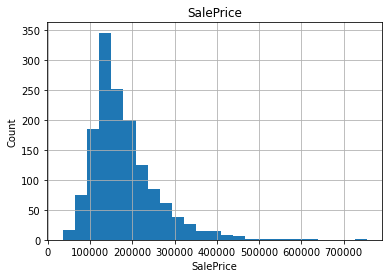

In [58]:
for feature in continuous_feature:
    data = dataset.copy()
    dataset[feature].hist(bins =25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

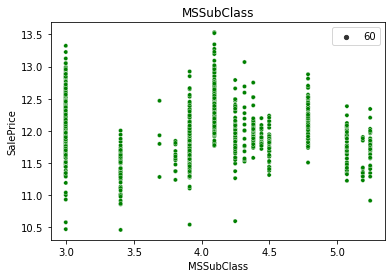

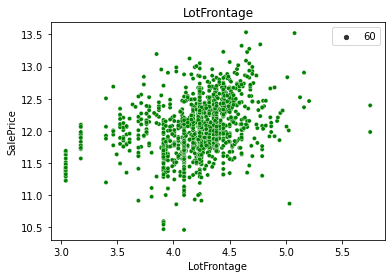

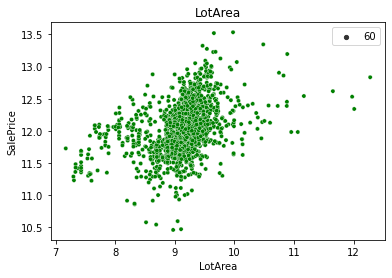

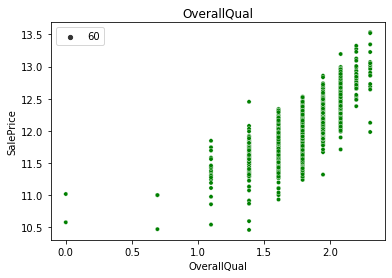

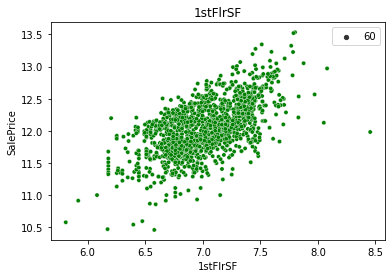

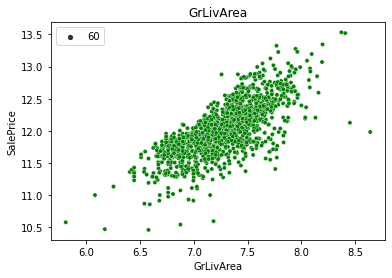

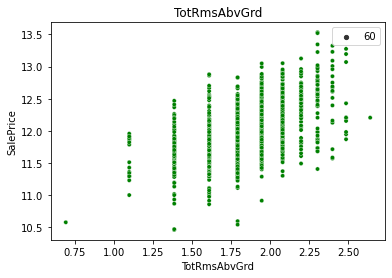

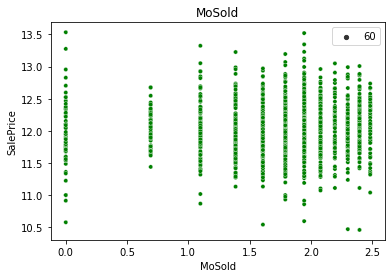

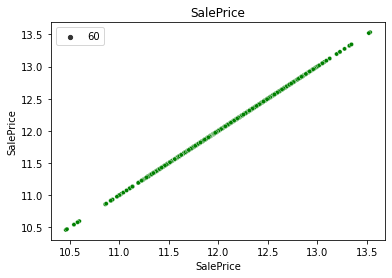

In [59]:
for feature in continuous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
            data[feature] = np.log(dataset[feature])
            data["SalePrice"] = np.log(dataset[f"SalePrice"])
            sns.scatterplot(data[feature],data["SalePrice"], palette = "magma", size =60, color = "green")
            plt.xlabel(feature)
            plt.ylabel("SalePrice")
            plt.title(feature)
            plt.show()
    

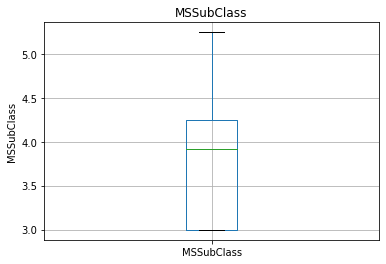

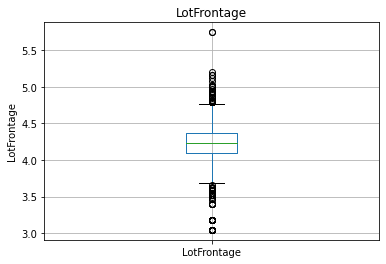

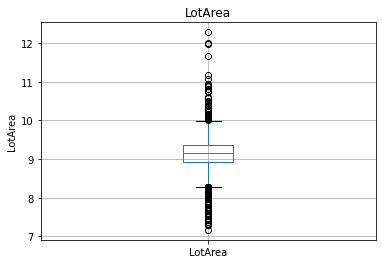

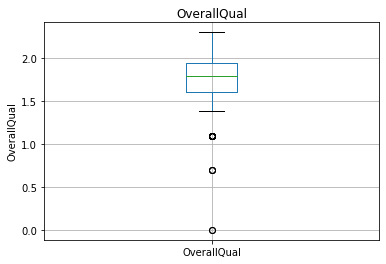

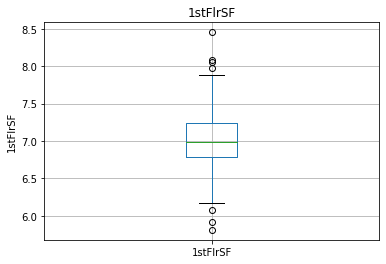

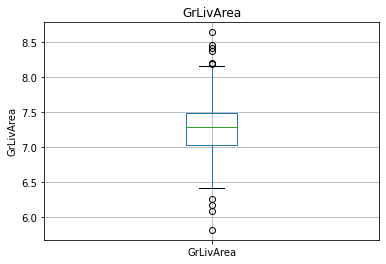

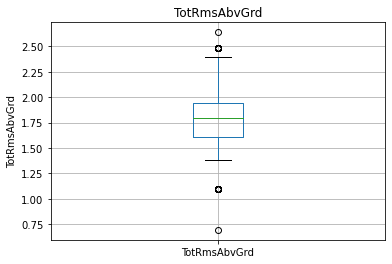

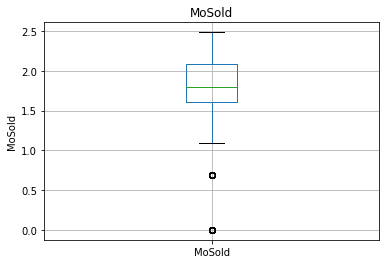

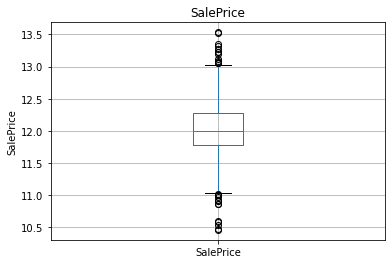

In [60]:
for feature in continuous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
            data[feature] = np.log(dataset[feature])
            data.boxplot(column=feature)
            plt.ylabel(feature)
            plt.title(feature)
            plt.show()
    

In [61]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [62]:
Num_Features = dataset.select_dtypes(include=['int64','float64'])

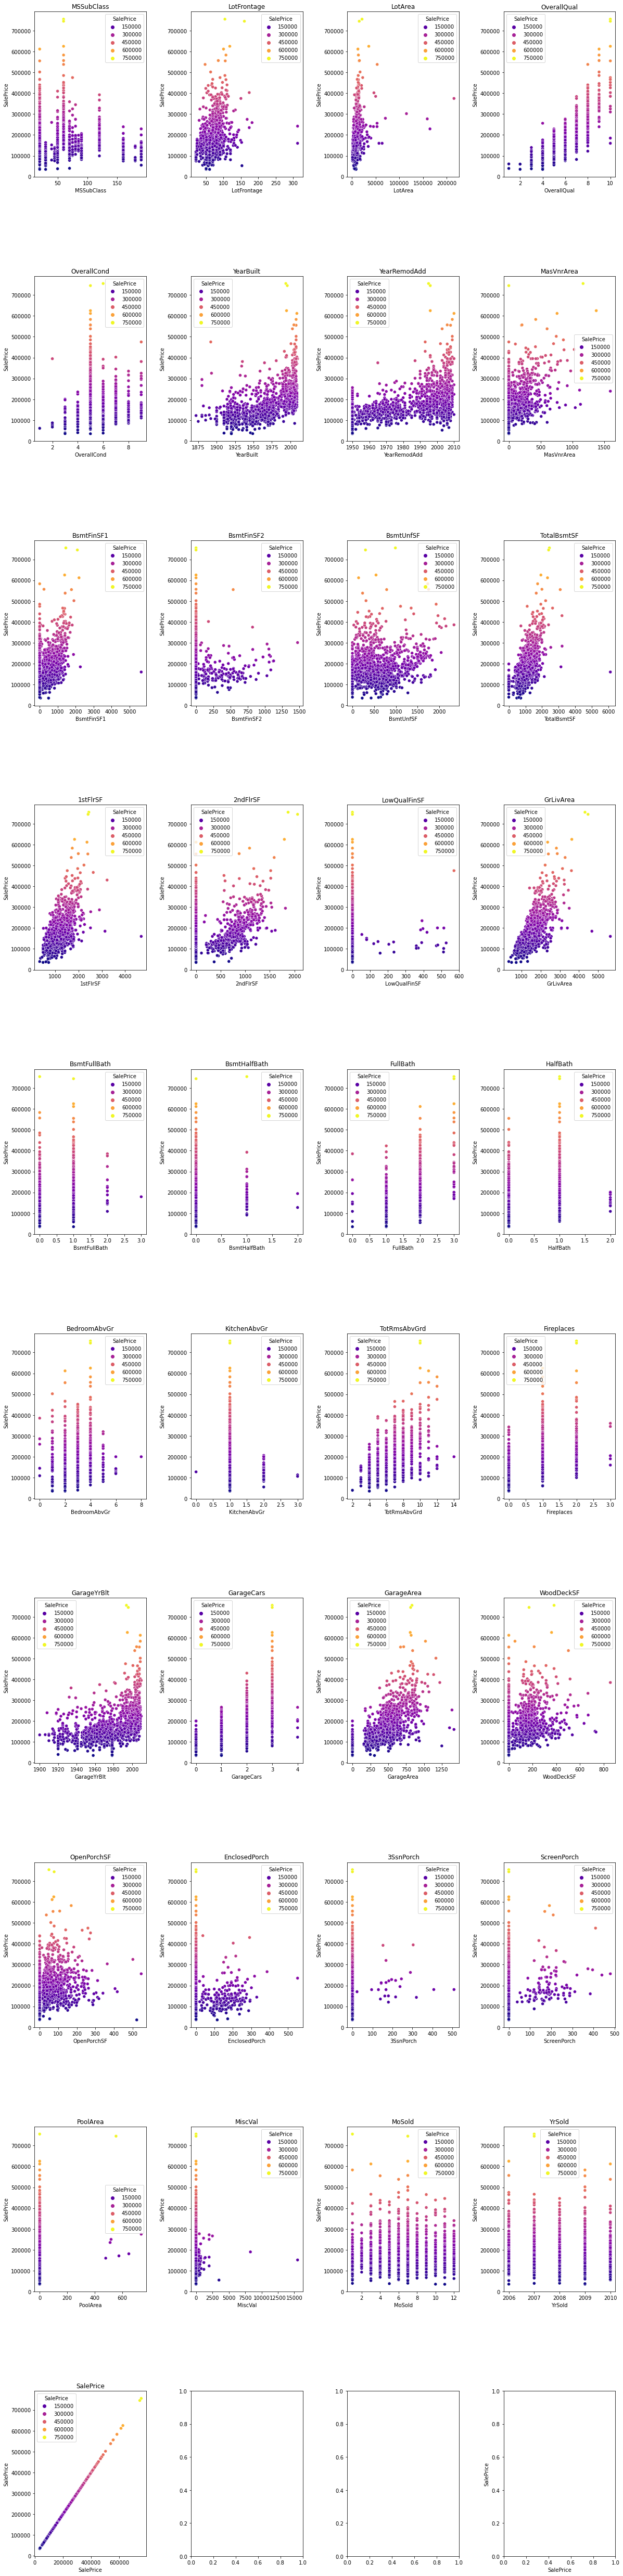

In [63]:
fig,axes = plt.subplots(10,4,figsize = (20,90))

for col,ax in zip(Num_Features.columns,axes.flatten()):
    sns.scatterplot(x= col, y="SalePrice", hue = "SalePrice", data = Num_Features, palette = "plasma",ax=ax)
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    ax.set_title(col)
    plt.subplots_adjust(hspace=.6,wspace = .4)

# Variables Having High Corelation
Overall Qual

YearBuilt

Grliv Area

1st, 2nd flrSF

Garage area

#Noisy Data

BsmntFullBath

Fireplaces

BedroonaboveGR

MO SOld

Yrsold

PoolArea

In [64]:
for feature in ["YearBuilt","YearRemodAdd","GarageYrBlt"]:
    dataset[feature] = dataset["YrSold"]-dataset[feature]

In [65]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Applying Log Normal Distribution in Skewed features. Cond: They should not have 0, if 0 then as we know it should be skipped.

In [66]:
import numpy as np
num_features = ["LotFrontage","LotArea","1stFlrSF","GrLivArea","SalePrice"]

for feature in num_features:
    dataset[feature] = np.log(dataset[feature])

In [67]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


In [68]:
pd.set_option('display.max_rows', None)

In [69]:
dataset.corr()["SalePrice"].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.730255
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.608947
FullBath         0.594771
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.429531
LotArea          0.399918
BsmtFinSF1       0.372023
LotFrontage      0.345755
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
GarageYrBlt     -0.501716
YearRemodAdd    -0.568136
YearBuilt       -0.587290
Name: SalePrice, dtype: float64

# Basis EDA and Trial of Model applications the below variables were acting as noise without adding any value and hence are dropped.

In [70]:
dataset = dataset.drop(["MSSubClass",'LotFrontage','LotShape',"LandContour",'LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation'], axis =1)

In [71]:
dataset = dataset.drop(['BsmtCond','BsmtUnfSF','BsmtFinType2','BsmtFinType1','Electrical','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','GarageType','GarageYrBlt','GarageFinish','GarageArea','GarageQual','GarageCond'],axis=1)

In [72]:
dataset=dataset.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','PoolArea','MiscVal','MoSold','SaleType'],axis=1)

In [73]:
dataset.columns

Index(['MSZoning', 'LotArea', 'Street', 'Utilities', 'LandSlope', 'Condition2',
       'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive',
       'ScreenPorch', 'YrSold', 'SaleCondition', 'SalePrice'],
      dtype='object')

# Encoding

In [74]:
dataset= pd.get_dummies(dataset, columns=['MSZoning','Street','LandSlope','Condition2','BsmtQual','BsmtExposure',
                                           'Heating','HeatingQC','CentralAir','KitchenQual','Functional',
                                           'PavedDrive','Utilities','SaleCondition'],drop_first=True)

In [75]:
dataset.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,KitchenAbvGr,Fireplaces,GarageCars,ScreenPorch,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandSlope_Mod,LandSlope_Sev,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,Utilities_NoSeWa,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.041922,7,5,5,706,0,856,6.752270,854,7.444249,1,0,2,0,2008,12.247694,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,9.169518,6,8,31,978,0,1262,7.140453,0,7.140453,1,1,2,0,2007,12.109011,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,9.328123,7,5,7,486,0,920,6.824374,866,7.487734,1,1,2,0,2008,12.317167,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,9.164296,7,5,91,216,0,756,6.867974,756,7.448334,1,1,3,0,2006,11.849398,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,9.565214,8,5,8,655,0,1145,7.043160,1053,7.695303,1,1,3,0,2008,12.429216,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1460 non-null   float64
 1   OverallQual            1460 non-null   int64  
 2   OverallCond            1460 non-null   int64  
 3   YearBuilt              1460 non-null   int64  
 4   BsmtFinSF1             1460 non-null   int64  
 5   BsmtFinSF2             1460 non-null   int64  
 6   TotalBsmtSF            1460 non-null   int64  
 7   1stFlrSF               1460 non-null   float64
 8   2ndFlrSF               1460 non-null   int64  
 9   GrLivArea              1460 non-null   float64
 10  KitchenAbvGr           1460 non-null   int64  
 11  Fireplaces             1460 non-null   int64  
 12  GarageCars             1460 non-null   int64  
 13  ScreenPorch            1460 non-null   int64  
 14  YrSold                 1460 non-null   int64  
 15  Sale

In [77]:
dataset= dataset[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'ScreenPorch', 'YrSold',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LandSlope_Mod', 'LandSlope_Sev', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN','BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No','Heating_GasW', 'Heating_Grav','Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd',
       'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2',
       'Functional_Min1', 'Functional_Min2', 'Functional_Mod',
       'Functional_Sev', 'Functional_Typ', 'PavedDrive_P', 'PavedDrive_Y','SaleCondition_AdjLand',
        'SaleCondition_Alloca','SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial',"SalePrice"]]

In [78]:
#Splitting of X and Y Variable

In [79]:
x = dataset.drop(["SalePrice"],axis=1)

In [80]:
y = dataset["SalePrice"]

# Train and Test Split

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=101)

In [82]:
#Altough Feature scaling was tested with both MinMAx and StandardScaler. It wont have impact on result.So not using feature scaling.

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xm = scaler.fit_transform(x)

# Model Applications

# Application of OLS Model

In [84]:
import statsmodels.regression.linear_model as smf
from statsmodels.regression.linear_model import OLS

In [85]:
Reg_Model = smf.OLS(endog = y_train, exog = x_train).fit()
Reg_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.169e+05
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                        0.00
Time:                        20:58:57   Log-Likelihood:                          810.91
No. Observations:                1021   AIC:                                     -1514.
Df Residuals:                     967   BIC:                                     -1248.
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotArea                   0.0817      0.010      8.193      0.000       0.062       0.101
OverallQual               0.0628      0.005     12.224      0.000       0.053       0.073
OverallCond               0.0433      0.004     10.930      0.000       0.036       0.051
YearBuilt                -0.0021      0.000     -8.190      0.000      -0.003      -0.002
BsmtFinSF1             8.892e-05   1.04e-05      8.585      0.000    6.86e-05       0.000
BsmtFinSF2             6.802e-05   2.27e-05      3.000      0.003    2.35e-05       0.000
TotalBsmtSF            9.795e-05   1.74e-05      5.637      0.000    6.39e-05       0.000
1stFlrSF                  0.1382      0.041      3.384      0.001       0.058       0.218
2ndFlrSF                  0.0001   3.11e-05      4.001      0.000    6.34e-05       0.000
GrLivArea                 0.2194      0.049      4.514      0.000       0.124       0.315
KitchenAbvGr             -0.0859      0.021     -4.072      0.000      -0.127      -0.045
Fireplaces                0.0239      0.007      3.447      0.001       0.010       0.038
GarageCars                0.0566      0.007      8.112      0.000       0.043       0.070
ScreenPorch               0.0001   6.82e-05      2.179      0.030    1.47e-05       0.000
YrSold                    0.0038      0.000     36.679      0.000       0.004       0.004
MSZoning_FV               0.1717      0.055      3.121      0.002       0.064       0.280
MSZoning_RH               0.1913      0.063      3.026      0.003       0.067       0.315
MSZoning_RL               0.0972      0.052      1.869      0.062      -0.005       0.199
MSZoning_RM               0.0572      0.052      1.108      0.268      -0.044       0.159
Street_Pave               0.1006      0.054      1.867      0.062      -0.005       0.206
LandSlope_Mod             0.0264      0.019      1.415      0.157      -0.010       0.063
LandSlope_Sev            -0.0571      0.041     -1.386      0.166      -0.138       0.024
Condition2_Feedr          0.0891      0.107      0.835      0.404      -0.120       0.298
Condition2_Norm           0.0797      0.060      1.327      0.185      -0.038       0.198
Condition2_PosA           0.2257      0.131      1.721      0.086      -0.032       0.483
Condition2_PosN          -0.7736      0.102     -7.577      0.000      -0.974      -0.573
BsmtQual_Fa              -0.0806      0.032     -2.480      0.013      -0.144      -0.017
BsmtQual_Gd              -0.0540      0.017     -3.145      0.002      -0.088      -0.020
BsmtQual_TA              -0.0668      0.021     -3.192      0.001      -0.108      -0.026
BsmtExposure_Gd           0.0189      0.016      1.189      0.235      -0.012       0.050
BsmtExposure_M

# Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [87]:
y_pred = model.predict(x_test)

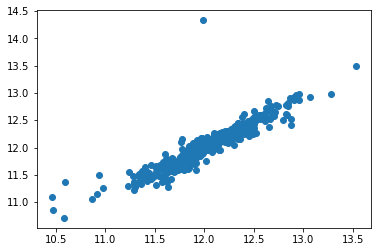

In [88]:
plt.scatter(y_test, y_pred)

In [89]:
# calculate metrics

from sklearn import metrics

In [90]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.00775834530780915


In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.09231171608639517


In [92]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 0.028062008552714852


In [93]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 0.16751718882763897


In [94]:
from sklearn.metrics import mean_squared_log_error

In [95]:
np.sqrt(mean_squared_log_error( y_test, y_pred))

0.012595413882159972

In [96]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [97]:
y_pred_train = linear_model.predict(x_train)
y_pred_test = linear_model.predict(x_test)

In [98]:
from sklearn.metrics import r2_score 

In [99]:
print("Training result: ", r2_score(y_train, y_pred_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_test))

Training result:  0.923263163542502
########################################################################################################################
Test result:  0.833508579522112


# Regularizaton: Lasso and Ridge

In [100]:
#Using Feature Selection

In [101]:
from sklearn.linear_model import Lasso
import statsmodels.api as sma

In [102]:
from sklearn.feature_selection import SelectFromModel

In [103]:
pd.pandas.set_option("display.max_columns",None)

In [104]:
dataset.head()

,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,KitchenAbvGr,Fireplaces,GarageCars,ScreenPorch,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandSlope_Mod,LandSlope_Sev,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,9.041922,7,5,5,706,0,856,6.752270,854,7.444249,1,0,2,0,2008,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,12.247694
1,9.169518,6,8,31,978,0,1262,7.140453,0,7.140453,1,1,2,0,2007,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,12.109011
2,9.328123,7,5,7,486,0,920,6.824374,866,7.487734,1,1,2,0,2008,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,12.317167
3,9.164296,7,5,91,216,0,756,6.867974,756,7.448334,1,1,3,0,2006,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,11.849398
4,9.565214,8,5,8,655,0,1145,7.043160,1053,7.695303,1,1,3,0,2008,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,12.429216


In [105]:
xz = dataset.drop(["SalePrice"],axis=1)

In [106]:
yz = dataset["SalePrice"]

In [107]:
feature_selection = SelectFromModel(Lasso(alpha=0.1,random_state=101))


In [108]:
feature_selection.fit(xz,yz)

SelectFromModel(estimator=Lasso(alpha=0.1, random_state=101))

In [109]:
feature_selection.get_support()

array([False,  True, False,  True,  True,  True,  True, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [110]:
selected_features= xz.columns[(feature_selection.get_support())]

#Print Details

print("Total Features:{}".format(xz.shape[1]))
print("Selected Features:{}".format(len(selected_features)))

Total Features:56
Selected Features:7


In [111]:
xz.head()

,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,KitchenAbvGr,Fireplaces,GarageCars,ScreenPorch,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandSlope_Mod,LandSlope_Sev,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.041922,7,5,5,706,0,856,6.752270,854,7.444249,1,0,2,0,2008,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,9.169518,6,8,31,978,0,1262,7.140453,0,7.140453,1,1,2,0,2007,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,9.328123,7,5,7,486,0,920,6.824374,866,7.487734,1,1,2,0,2008,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3,9.164296,7,5,91,216,0,756,6.867974,756,7.448334,1,1,3,0,2006,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,9.565214,8,5,8,655,0,1145,7.043160,1053,7.695303,1,1,3,0,2008,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0


In [112]:
from sklearn.model_selection import train_test_split
xf_train, xf_test, yf_train, yf_test = train_test_split(xz, yz, train_size=0.70, random_state=101)

In [113]:
Reg_Model = smf.OLS(endog = yf_train, exog = xf_train).fit()
Reg_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.169e+05
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                        0.00
Time:                        20:58:59   Log-Likelihood:                          810.91
No. Observations:                1021   AIC:                                     -1514.
Df Residuals:                     967   BIC:                                     -1248.
Df Model:                          54                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotArea                   0.0817      0.010      8.193      0.000       0.062       0.101
OverallQual               0.0628      0.005     12.224      0.000       0.053       0.073
OverallCond               0.0433      0.004     10.930      0.000       0.036       0.051
YearBuilt                -0.0021      0.000     -8.190      0.000      -0.003      -0.002
BsmtFinSF1             8.892e-05   1.04e-05      8.585      0.000    6.86e-05       0.000
BsmtFinSF2             6.802e-05   2.27e-05      3.000      0.003    2.35e-05       0.000
TotalBsmtSF            9.795e-05   1.74e-05      5.637      0.000    6.39e-05       0.000
1stFlrSF                  0.1382      0.041      3.384      0.001       0.058       0.218
2ndFlrSF                  0.0001   3.11e-05      4.001      0.000    6.34e-05       0.000
GrLivArea                 0.2194      0.049      4.514      0.000       0.124       0.315
KitchenAbvGr             -0.0859      0.021     -4.072      0.000      -0.127      -0.045
Fireplaces                0.0239      0.007      3.447      0.001       0.010       0.038
GarageCars                0.0566      0.007      8.112      0.000       0.043       0.070
ScreenPorch               0.0001   6.82e-05      2.179      0.030    1.47e-05       0.000
YrSold                    0.0038      0.000     36.679      0.000       0.004       0.004
MSZoning_FV               0.1717      0.055      3.121      0.002       0.064       0.280
MSZoning_RH               0.1913      0.063      3.026      0.003       0.067       0.315
MSZoning_RL               0.0972      0.052      1.869      0.062      -0.005       0.199
MSZoning_RM               0.0572      0.052      1.108      0.268      -0.044       0.159
Street_Pave               0.1006      0.054      1.867      0.062      -0.005       0.206
LandSlope_Mod             0.0264      0.019      1.415      0.157      -0.010       0.063
LandSlope_Sev            -0.0571      0.041     -1.386      0.166      -0.138       0.024
Condition2_Feedr          0.0891      0.107      0.835      0.404      -0.120       0.298
Condition2_Norm           0.0797      0.060      1.327      0.185      -0.038       0.198
Condition2_PosA           0.2257      0.131      1.721      0.086      -0.032       0.483
Condition2_PosN          -0.7736      0.102     -7.577      0.000      -0.974      -0.573
BsmtQual_Fa              -0.0806      0.032     -2.480      0.013      -0.144      -0.017
BsmtQual_Gd              -0.0540      0.017     -3.145      0.002      -0.088      -0.020
BsmtQual_TA              -0.0668      0.021     -3.192      0.001      -0.108      -0.026
BsmtExposure_Gd           0.0189      0.016      1.189      0.235      -0.012       0.050
BsmtExposure_M

In [114]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xf_train, yf_train)

LinearRegression()

In [115]:
yf_pred_test = model.predict(xf_test)

In [116]:
yf_pred_train = model.predict(xf_train)

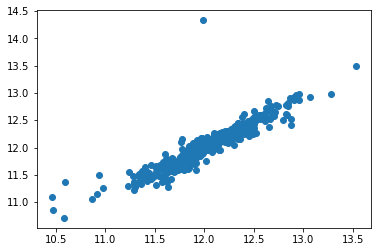

In [117]:
plt.scatter(yf_test, yf_pred_test)

In [118]:
print('MAE:', metrics.mean_absolute_error(yf_test, yf_pred_test))

MAE: 0.09231171608639517


In [119]:
print('MAPE:', metrics.mean_absolute_percentage_error(yf_test, yf_pred_test))

MAPE: 0.00775834530780915


In [120]:
print('MSE:', metrics.mean_squared_error(yf_test, yf_pred_test))

MSE: 0.028062008552714852


In [121]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(yf_test, yf_pred_test)))

RMSE: 0.16751718882763897


In [122]:
np.sqrt(mean_squared_log_error( yf_test, yf_pred_test))

0.012595413882159972

In [123]:
    print("Training result: ", r2_score(yf_train, yf_pred_train))
    print("############"*10)

    print("Test result: ", r2_score(yf_test, yf_pred_test))

Training result:  0.923263163542502
########################################################################################################################
Test result:  0.833508579522112


# XG Boost

In [124]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [125]:
y_pred_xgb_train = xgb.predict(x_train)
y_pred_xgb_test = xgb.predict(x_test)

In [126]:
print("Training result: ", r2_score(y_train, y_pred_xgb_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_xgb_test))

Training result:  0.9991501206361231
########################################################################################################################
Test result:  0.8749718562111528


In [127]:
np.sqrt(mean_squared_log_error( y_test,y_pred_xgb_test))

0.011442842523297483

# PCA

In [128]:
correlation = dataset.corr()["SalePrice"].abs().sort_values(ascending = False)

In [129]:
correlation

SalePrice                1.000000
OverallQual              0.817184
GrLivArea                0.730255
GarageCars               0.680625
TotalBsmtSF              0.612134
1stFlrSF                 0.608947
YearBuilt                0.587290
BsmtQual_TA              0.538391
KitchenQual_TA           0.538237
Fireplaces               0.489449
KitchenQual_Gd           0.406601
LotArea                  0.399918
BsmtFinSF1               0.372023
CentralAir_Y             0.351600
MSZoning_RM              0.347446
HeatingQC_TA             0.335429
BsmtQual_Gd              0.334332
SaleCondition_Partial    0.324471
2ndFlrSF                 0.319300
BsmtExposure_No          0.306102
PavedDrive_Y             0.299959
MSZoning_RL              0.298862
BsmtExposure_Gd          0.270918
KitchenQual_Fa           0.215516
HeatingQC_Fa             0.180613
BsmtQual_Fa              0.159521
Heating_Grav             0.149166
KitchenAbvGr             0.147548
Functional_Typ           0.133545
HeatingQC_Gd  

In [130]:
Significant_features = correlation[correlation>.4].index.to_list()[1:]# list by name of features

In [131]:
Significant_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 '1stFlrSF',
 'YearBuilt',
 'BsmtQual_TA',
 'KitchenQual_TA',
 'Fireplaces',
 'KitchenQual_Gd']

In [132]:
dataset.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'ScreenPorch', 'YrSold',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LandSlope_Mod', 'LandSlope_Sev', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'Heating_GasW', 'Heating_Grav', 'Heating_Wall',
       'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA',
       'CentralAir_Y', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'PavedDrive_P',
       'PavedDrive_Y', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleConditio

In [133]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
pca.fit(x_scaled)


PCA()

In [135]:
print("Variation Percentages:")
print(pca.explained_variance_ratio_.cumsum()*100)
print()

Variation Percentages:
[ 11.99161509  17.54322491  21.81358773  25.50579649  29.00669848
  32.3408582   35.42872698  38.36032027  41.01290731  43.51594577
  45.8743246   48.1352756   50.33074958  52.4894542   54.60544478
  56.64397264  58.60666323  60.54759051  62.45658611  64.31769045
  66.14399885  67.95468506  69.75008877  71.52079447  73.24605667
  74.90527161  76.5547001   78.17997109  79.74058045  81.26962957
  82.78892083  84.23682438  85.63802179  87.00337693  88.23846881
  89.41323918  90.50848915  91.52788946  92.51051241  93.44818498
  94.33165561  95.1139328   95.8662323   96.59720261  97.23852563
  97.77150551  98.22017498  98.6074862   98.9741218   99.26197163
  99.54094411  99.70160355  99.82578261  99.92963656  99.97163269
 100.        ]



In [136]:
pca_components = abs(pca.components_)
print(pca_components)

[[0.13654428 0.30786505 0.08598471 ... 0.00875526 0.08119893 0.15401208]
 [0.33573999 0.07995933 0.01726817 ... 0.02510249 0.05384814 0.10214485]
 [0.1179978  0.1283731  0.05047279 ... 0.01454809 0.09866077 0.10415465]
 ...
 [0.00284699 0.0083988  0.0249108  ... 0.00670934 0.03061603 0.03909529]
 [0.01928701 0.03616989 0.01647262 ... 0.0026469  0.00035354 0.00580545]
 [0.00060894 0.02454707 0.01178174 ... 0.00926116 0.02877951 0.02130128]]


In [137]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {dataset.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['OverallQual', 'YearBuilt', 'GarageCars', 'BsmtQual_TA']
Component 1: ['LotArea', '1stFlrSF', 'MSZoning_RL', 'MSZoning_FV']
Component 2: ['GrLivArea', 'PavedDrive_Y', 'CentralAir_Y', '2ndFlrSF']
Component 3: ['SaleCondition_Normal', '2ndFlrSF', 'SaleCondition_Partial', 'OverallCond']
Component 4: ['Functional_Typ', 'Condition2_Norm', 'OverallCond', 'Condition2_Feedr']
Component 5: ['HeatingQC_Fa', 'SaleCondition_Normal', 'Heating_Grav', 'MSZoning_RL']
Component 6: ['BsmtExposure_No', 'BsmtExposure_Gd', 'MSZoning_RM', 'MSZoning_RL']
Component 7: ['Condition2_Norm', 'Condition2_Feedr', 'MSZoning_RL', 'MSZoning_RM']
Component 8: ['HeatingQC_TA', 'SaleCondition_Partial', 'SaleCondition_Alloca', 'BsmtQual_Gd']
Component 9: ['BsmtQual_Fa', 'MSZoning_RM', 'BsmtExposure_Mn', 'MSZoning_RL']
Component 10: ['KitchenAbvGr', 'HeatingQC_Gd', 'BsmtFinSF2', 'LandSlope_Sev']
Component 11: ['BsmtExposure_Mn', 'LandSlope_Mod', 'Street_Pave', '

In [138]:
X_pca = pca.transform(x_scaled)
print(X_pca.shape)
print(X_pca)

(1460, 56)
[[ 1.64273955 -1.86992186 -0.29907754 ... -0.058598   -0.09916602
   0.01184491]
 [ 1.38248251  1.36249343 -1.1433043  ...  0.1057919  -0.03638639
   0.03798729]
 [ 2.45279187 -1.11286201  0.26361532 ... -0.07248811 -0.06567649
  -0.01007693]
 ...
 [ 0.44744402  0.24811842  0.77946222 ...  0.03738418  0.15422246
   0.03789667]
 [-0.83970539  0.96089276 -1.44408315 ... -0.09157029  0.05978799
  -0.00991997]
 [-1.371679    1.35171466 -1.64517666 ... -0.03019388 -0.01789884
   0.00979542]]


In [139]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
_sc = StandardScaler()
_pca = PCA(n_components = None)
_model = XGBRegressor()
XGBs_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size =.7, random_state = 101)
XGBmodel = XGBRegressor()
XGBmodel.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [141]:
y_pred_xgb_train = XGBmodel.predict(x_train)
y_pred_xgb_test = XGBmodel.predict(x_test)

In [142]:
X_train, X_test, y_train, y_test = \
    train_test_split(x, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=102)

In [143]:
XGBs_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA()),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [144]:
XGBs_model.score(X_test,y_test)

0.8381614842227931

In [145]:
####


In [146]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = scaler.fit_transform(x)


In [147]:
from sklearn.decomposition import PCA
pca = PCA(n_components = .99)
pca.fit(x_scaled)


PCA(n_components=0.99)

In [148]:
print("Variation Percentages:")
print(pca.explained_variance_ratio_.cumsum()*100)
print()

Variation Percentages:
[11.99161509 17.54322491 21.81358773 25.50579649 29.00669848 32.3408582
 35.42872698 38.36032027 41.01290731 43.51594577 45.8743246  48.1352756
 50.33074958 52.4894542  54.60544478 56.64397264 58.60666323 60.54759051
 62.45658611 64.31769045 66.14399885 67.95468506 69.75008877 71.52079447
 73.24605667 74.90527161 76.5547001  78.17997109 79.74058045 81.26962957
 82.78892083 84.23682438 85.63802179 87.00337693 88.23846881 89.41323918
 90.50848915 91.52788946 92.51051241 93.44818498 94.33165561 95.1139328
 95.8662323  96.59720261 97.23852563 97.77150551 98.22017498 98.6074862
 98.9741218  99.26197163]



In [149]:
# print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {dataset.columns[indices].to_list()}')

Component 0: ['OverallQual', 'YearBuilt', 'GarageCars', 'BsmtQual_TA']
Component 1: ['LotArea', '1stFlrSF', 'MSZoning_RL', 'MSZoning_FV']
Component 2: ['GrLivArea', 'PavedDrive_Y', 'CentralAir_Y', '2ndFlrSF']
Component 3: ['SaleCondition_Normal', '2ndFlrSF', 'SaleCondition_Partial', 'OverallCond']
Component 4: ['Functional_Typ', 'Condition2_Norm', 'OverallCond', 'Condition2_Feedr']
Component 5: ['HeatingQC_Fa', 'SaleCondition_Normal', 'Heating_Grav', 'MSZoning_RL']
Component 6: ['BsmtExposure_No', 'BsmtExposure_Gd', 'MSZoning_RM', 'MSZoning_RL']
Component 7: ['Condition2_Norm', 'Condition2_Feedr', 'MSZoning_RL', 'MSZoning_RM']
Component 8: ['HeatingQC_TA', 'SaleCondition_Partial', 'SaleCondition_Alloca', 'BsmtQual_Gd']
Component 9: ['BsmtQual_Fa', 'MSZoning_RM', 'BsmtExposure_Mn', 'MSZoning_RL']
Component 10: ['KitchenAbvGr', 'HeatingQC_Gd', 'BsmtFinSF2', 'LandSlope_Sev']
Component 11: ['BsmtExposure_Mn', 'LandSlope_Mod', 'Street_Pave', 'Heating_GasW']
Component 12: ['BsmtExposure_Mn',

# PCA Pipeline

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
_sc = StandardScaler()
_pca = PCA(n_components = None)
_model = XGBRegressor()
XGBs_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('XGBs', _model)
])

In [151]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size =.7, random_state = 101)

In [152]:

XGBmodel = XGBRegressor()
XGBmodel.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [153]:
y_pred_xgb_train = XGBmodel.predict(x_train)
y_pred_xgb_test = XGBmodel.predict(x_test)

In [154]:
print("Training result: ", r2_score(y_train,y_pred_xgb_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_xgb_test))

Training result:  0.9991501206361231
########################################################################################################################
Test result:  0.8749718562111528


In [155]:
np.sqrt(mean_squared_log_error(y_test, y_pred_xgb_test))

0.011442842523297483

# Random Forest

In [156]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [157]:
np.sqrt(mean_squared_log_error(y_test, y_pred_xgb_test))

0.011442842523297483

In [158]:
mean_squared_log_error(y_test, y_pred_xgb_test)

0.00013093864501298512

In [159]:
y_pred_RF_train = RF.predict(x_train)
y_pred_RF_test = RF.predict(x_test)

In [160]:
print("Training result: ", r2_score(y_train, y_pred_RF_train))
print("############"*10)

print("Test result: ", r2_score(y_test, y_pred_RF_test))

Training result:  0.9810831682354004
########################################################################################################################
Test result:  0.8593167229365993


In [161]:
np.sqrt(mean_squared_log_error(y_test, y_pred_RF_test))

0.01210500194882454

In [162]:
dataset.nunique()

LotArea                  1073
OverallQual                10
OverallCond                 9
YearBuilt                 122
BsmtFinSF1                637
BsmtFinSF2                144
TotalBsmtSF               721
1stFlrSF                  753
2ndFlrSF                  417
GrLivArea                 861
KitchenAbvGr                4
Fireplaces                  4
GarageCars                  5
ScreenPorch                76
YrSold                      5
MSZoning_FV                 2
MSZoning_RH                 2
MSZoning_RL                 2
MSZoning_RM                 2
Street_Pave                 2
LandSlope_Mod               2
LandSlope_Sev               2
Condition2_Feedr            2
Condition2_Norm             2
Condition2_PosA             2
Condition2_PosN             2
BsmtQual_Fa                 2
BsmtQual_Gd                 2
BsmtQual_TA                 2
BsmtExposure_Gd             2
BsmtExposure_Mn             2
BsmtExposure_No             2
Heating_GasW                2
Heating_Gr

# XGBoost is giving best result and hence will be considered as the right model for prdicting the values

# Applying the Model on Test Data Set

In [163]:
df = pd.read_csv("test.csv")

In [166]:
data1= df.copy()

#Applying the Same Encoding criteria as in Train Model

In [169]:
df= pd.get_dummies(df, columns=['MSZoning','Street','LandSlope','Condition2','BsmtQual','BsmtExposure',
                                           'Heating','HeatingQC','CentralAir','KitchenQual','Functional',
                                           'PavedDrive','Utilities','SaleCondition'],drop_first=True)

In [ ]:
df = df[['MSZoning', 'LotArea', 'Street', 'Utilities', 'LandSlope', 'Condition2',
       'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive',
       'ScreenPorch', 'YrSold', 'SaleCondition']]

In [170]:
df = df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'ScreenPorch', 'YrSold',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LandSlope_Mod', 'LandSlope_Sev', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN','BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No','Heating_GasW', 'Heating_Grav','Heating_Wall', 'HeatingQC_Fa', 'HeatingQC_Gd',
       'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_Y', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2',
       'Functional_Min1', 'Functional_Min2', 'Functional_Mod',
       'Functional_Sev', 'Functional_Typ', 'PavedDrive_P', 'PavedDrive_Y','SaleCondition_AdjLand',
        'SaleCondition_Alloca','SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial']]

In [171]:
df["SalePrice"] = xgb.predict(df)

In [203]:
# Since Log of Sale Price was taken, now the exp of same is applied

In [190]:
df['SalePrice'] = np.exp(df["SalePrice"])

In [196]:
submission= pd.DataFrame({
    'Id':data1['Id'],
    'SalePrice':df["SalePrice"]
})

In [194]:
submission.tail(40)

,Id,SalePrice
1419,2880,129849.679688
1420,2881,164879.312500
1421,2882,176901.484375
1422,2883,176549.906250
1423,2884,211210.703125
1424,2885,151014.750000
1425,2886,213113.843750
1426,2887,134967.062500
1427,2888,128396.132812
1428,2889,87770.906250


# Saving the File in CSV Format

In [200]:
submission.to_csv("House_Price_Prediction_Submission.csv",index = False)